# Clasificación NAIVE BAYES

In [49]:
import pandas as pd

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
solicitantes = pd.read_excel('/content/drive/MyDrive/Eafit/0. SolicitantesCrédito.xlsx')

In [52]:
solicitantes

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


In [53]:
solicitantes.shape

(8378, 35)

In [54]:
XD = solicitantes.dropna(subset=('PreApr')) # Eliminar los registros nulos

In [55]:
XD = XD[['Edad','Hijos','Perscargo','Estrato','Ingresos','Egresos', 'Monto (EAD)' , 'Plazo','Cuota (COP)']] # Eleccion de las varitables independientes

In [56]:
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [57]:
yd =solicitantes['PreApr'].dropna() # Variable dependiente

In [58]:
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [59]:
import numpy as np
import matplotlib.pyplot as plt

## Implementación del modelo

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
XDArray = np.array(XD, dtype=float) ## Array de las variables independientes
ydArray= np.array(yd, dtype=float) ## Array de las variable dependiente (y)

In [62]:
XDArray

array([[3.80000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        2.81503004e+06, 4.80000000e+01, 8.26915062e+04],
       [5.10000000e+01, 6.00000000e+00, 1.00000000e+00, ...,
        6.30143930e+05, 3.60000000e+01, 2.27812126e+04],
       [3.70000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        1.28054021e+06, 3.60000000e+01, 4.62945962e+04],
       ...,
       [3.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.67726552e+06, 3.60000000e+01, 9.67895621e+04],
       [4.30000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        1.37511242e+06, 3.60000000e+01, 4.97136082e+04],
       [3.70000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        4.52536592e+06, 3.60000000e+01, 1.63602819e+05]])

In [63]:
## Implementación del modelo Naive Bayes

modeloNB = GaussianNB() ## Variable que aloja el modelo. Con modeloNB podemos manipular el modelo.
modeloNB.fit(XDArray , ydArray) ## El parametro fit es el entrenamiento del modelo. Toma el conjunto de variables independientes y la vairbale dependiente.

GaussianNB()

In [64]:
ydPred = modeloNB.predict(XDArray) # Vamos a pasarle al modelo los mismos datos con los que aprendio y las guarda en ydpred (lo que arroja el modelo) y esta es mi predicción.

In [65]:
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

## Matriz de confusión

In [66]:
## La matriz de confusion nos ayuda a saber que taqn bien clasifica el modelo.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
cm=confusion_matrix(yd,ydPred) ## yd: y verdaderos, ydPred: y predicho
cm

array([[2539,  420],
       [1041, 1842]])

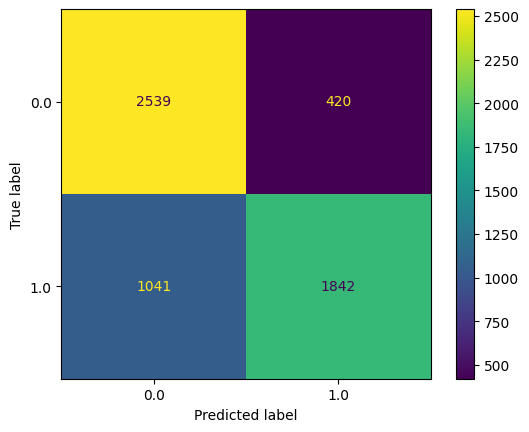

In [68]:
disp = ConfusionMatrixDisplay(cm, display_labels=modeloNB.classes_)
disp.plot() # Podemos cambiarle el mapa de color. Buscar la documentación de la libreria para ver otras opciones.
plt.show()

## Implementación del modelo con otro conjunto de datos

In [69]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [70]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]

XDGener = XDGener[['Edad','Hijos','Perscargo','Estrato','Plazo','Cuota (COP)','Ingresos','Egresos','Monto (EAD)']]  ## Reduzco las columnas solo a aquellas que necesito

In [71]:
## Soliitar la modelo que me haga el pronostico para los solicitantes que no estan clasificados aun.
ydGener=modeloNB.predict(XDGener)
ydGener


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

In [72]:
## Creo una SERIE que si puede contener indices
ydGenerSerie=pd.Series(ydGener,
                  index=solicitantes[solicitantes['PreApr'].isna()].index)


In [73]:
ydGenerSerie

,0
6,1.0
7,1.0
11,1.0
13,1.0
16,1.0
...,...
8357,1.0
8358,1.0
8367,1.0
8372,1.0


In [74]:
## Completo los valores de PreApr
solicitantes['PreApr'] .fillna(ydGenerSerie, inplace= True)
ydGenerSerie

/tmp/ipython-input-3738440014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'] .fillna(ydGenerSerie, inplace= True)


,0
6,1.0
7,1.0
11,1.0
13,1.0
16,1.0
...,...
8357,1.0
8358,1.0
8367,1.0
8372,1.0


In [75]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [76]:
solicitantes.to_excel('SolicitantesCompleta.xlsx')

## Recalcula las métricas de evaluación bajo este nuevo escenario y para cada métrica explica si mejoraron o desmejoraron y las razones identificadas.

In [77]:
## Extraigo los valores de la matriz de confucion
VN = cm[0,1] ; FP = cm[0,1]; VP = cm[1,1] ; FN = cm[1,0]

In [78]:
## exactitud
exactitud = (VP + VN)/cm.sum()

## Error
error = (FP + VN)/cm.sum()

## Precision
precision = VP/(FP+VP)

## Sensibilidad
sensibilidad = (VP/VP+FN)

## Especifidad
especifidad = VN/(FP+VN)

In [79]:
## Imprimo los mensajes
print (f'La exactitud del modelo es de {exactitud}')
print (f'El error del modelo es de {error:.2%}')
print (f'La precision del modelo es de {precision:.2%}')
print (f'La sensibilidad del modelo es de {sensibilidad:.2%}')
print (f'La especificidad del modelo es de {especifidad:.2%}')

La exactitud del modelo es de 0.3871961656966792
El error del modelo es de 14.38%
La precision del modelo es de 81.43%
La sensibilidad del modelo es de 104200.00%
La especificidad del modelo es de 50.00%


Exactitud:
La exactitud del modelo cambia al incluir más variables, ya que el modelo cuenta con más información del solicitante, lo que puede ayudar a clasificar mejor aunque también hace el modelo más complejo.

Error:
 un comportamiento contrario a la exactitud. Al cambiar la información utilizada por el modelo, también cambia la cantidad de clasificaciones incorrectas.

Precisión:
 puede verse levemente afectada porque algunas variables financieras como ingresos, egresos, plazo y cuota están relacionadas entre sí, lo que puede generar más errores al momento de predecir aprobaciones.

Sensibilidad:
 tiende a mejorar, ya que al incluir variables que reflejan mejor la carga financiera y familiar del solicitante, el modelo identifica con mayor facilidad a quienes tienen mayor probabilidad de ser preaprobados.

Especificidad:

 se mantiene relativamente estable, lo que indica que la capacidad del modelo para identificar correctamente a los solicitantes no preaprobados no cambia de forma significativa.
